# Importing relevant libraries

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import time

# Loading data set

In [254]:
data = pd.read_csv("plants_forest_data.csv")
data.head()

,Start Time,End Time,Tag,Note,Tree Type,Is Success
0,Wed Jun 01 00:48:49 GMT+01:00 2016,Wed Jun 01 00:48:49 GMT+01:00 2016,Unset,NaN,Bush,False
1,Wed Jun 01 10:57:26 GMT+01:00 2016,Wed Jun 01 11:17:26 GMT+01:00 2016,Social,NaN,Bush,True
2,Wed Jun 01 11:21:58 GMT+01:00 2016,Wed Jun 01 11:41:58 GMT+01:00 2016,Social,NaN,Bush,True
3,Wed Jun 15 00:05:53 GMT+01:00 2016,Wed Jun 15 00:06:27 GMT+01:00 2016,Social,NaN,Cedar,False
4,Wed Jun 15 00:07:13 GMT+01:00 2016,Wed Jun 15 01:07:13 GMT+01:00 2016,Social,NaN,Cedar,True


In [255]:
data.shape

(4054, 6)

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 6 columns):
Start Time    4054 non-null object
End Time      4054 non-null object
Tag           4054 non-null object
Note          35 non-null object
Tree Type     4054 non-null object
Is Success    4054 non-null bool
dtypes: bool(1), object(5)
memory usage: 162.4+ KB


# Organizing time data

In [257]:
# Setting time_stamp for start and end time
data['timestamp_start'] = pd.to_datetime(data['Start Time'], utc = True)
data['timestamp_end'] = pd.to_datetime(data['End Time'], utc = True)

# Getting all the time data
data['year'] = data['timestamp_start'].dt.year
data['hour'] = data['timestamp_start'].dt.hour
data['weekday'] = data['timestamp_start'].dt.weekday_name
data['month'] = data['timestamp_start'].dt.month


In [258]:
# Only gettign successful trees which have been planted
data_success = data[data['Is Success'] == True]
data_success.head()

,Start Time,End Time,Tag,Note,Tree Type,Is Success,timestamp_start,timestamp_end,year,hour,weekday,month
1,Wed Jun 01 10:57:26 GMT+01:00 2016,Wed Jun 01 11:17:26 GMT+01:00 2016,Social,NaN,Bush,True,2016-06-01 11:57:26+00:00,2016-06-01 12:17:26+00:00,2016,11,Wednesday,6
2,Wed Jun 01 11:21:58 GMT+01:00 2016,Wed Jun 01 11:41:58 GMT+01:00 2016,Social,NaN,Bush,True,2016-06-01 12:21:58+00:00,2016-06-01 12:41:58+00:00,2016,12,Wednesday,6
4,Wed Jun 15 00:07:13 GMT+01:00 2016,Wed Jun 15 01:07:13 GMT+01:00 2016,Social,NaN,Cedar,True,2016-06-15 01:07:13+00:00,2016-06-15 02:07:13+00:00,2016,1,Wednesday,6
6,Wed Jun 15 01:09:36 GMT+01:00 2016,Wed Jun 15 01:49:36 GMT+01:00 2016,Social,NaN,Cedar,True,2016-06-15 02:09:36+00:00,2016-06-15 02:49:36+00:00,2016,2,Wednesday,6
7,Wed Jun 15 10:28:06 GMT+01:00 2016,Wed Jun 15 10:58:06 GMT+01:00 2016,Social,NaN,Cedar,True,2016-06-15 11:28:06+00:00,2016-06-15 11:58:06+00:00,2016,11,Wednesday,6


# Creating time difference column

In [259]:
data_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4029 entries, 1 to 4053
Data columns (total 12 columns):
Start Time         4029 non-null object
End Time           4029 non-null object
Tag                4029 non-null object
Note               34 non-null object
Tree Type          4029 non-null object
Is Success         4029 non-null bool
timestamp_start    4029 non-null datetime64[ns, UTC]
timestamp_end      4029 non-null datetime64[ns, UTC]
year               4029 non-null int64
hour               4029 non-null int64
weekday            4029 non-null object
month              4029 non-null int64
dtypes: bool(1), datetime64[ns, UTC](2), int64(3), object(6)
memory usage: 381.7+ KB


In [260]:
# Testing purposes
#t2 = data_success['timestamp_end']
#t1 = data_success['timestamp_start']

In [261]:
# Testing purposes
#t2.iloc[0]-t1.iloc[0]

In [262]:
# Get the difference in time, timepoints substraction
data_success['time_diff'] = data_success.apply(lambda x: x['timestamp_end'] - x['timestamp_start'], 
                                               axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [263]:
data_success.head()

,Start Time,End Time,Tag,Note,Tree Type,Is Success,timestamp_start,timestamp_end,year,hour,weekday,month,time_diff
1,Wed Jun 01 10:57:26 GMT+01:00 2016,Wed Jun 01 11:17:26 GMT+01:00 2016,Social,NaN,Bush,True,2016-06-01 11:57:26+00:00,2016-06-01 12:17:26+00:00,2016,11,Wednesday,6,00:20:00
2,Wed Jun 01 11:21:58 GMT+01:00 2016,Wed Jun 01 11:41:58 GMT+01:00 2016,Social,NaN,Bush,True,2016-06-01 12:21:58+00:00,2016-06-01 12:41:58+00:00,2016,12,Wednesday,6,00:20:00
4,Wed Jun 15 00:07:13 GMT+01:00 2016,Wed Jun 15 01:07:13 GMT+01:00 2016,Social,NaN,Cedar,True,2016-06-15 01:07:13+00:00,2016-06-15 02:07:13+00:00,2016,1,Wednesday,6,01:00:00
6,Wed Jun 15 01:09:36 GMT+01:00 2016,Wed Jun 15 01:49:36 GMT+01:00 2016,Social,NaN,Cedar,True,2016-06-15 02:09:36+00:00,2016-06-15 02:49:36+00:00,2016,2,Wednesday,6,00:40:00
7,Wed Jun 15 10:28:06 GMT+01:00 2016,Wed Jun 15 10:58:06 GMT+01:00 2016,Social,NaN,Cedar,True,2016-06-15 11:28:06+00:00,2016-06-15 11:58:06+00:00,2016,11,Wednesday,6,00:30:00


In [264]:
# Testing to get the time value (minute format)
#data_success.time_diff.iloc[0].total_seconds()/3600

In [276]:
# divide by 60 for minutes, 60*60 for hour
data_success['time_diff_min'] = data_success.apply(lambda x: x.time_diff.total_seconds()/(60*60), 
                                               axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [277]:
data_success.head()

,Start Time,End Time,Tag,Note,Tree Type,Is Success,timestamp_start,timestamp_end,year,hour,weekday,month,time_diff,time_diff_min
1,Wed Jun 01 10:57:26 GMT+01:00 2016,Wed Jun 01 11:17:26 GMT+01:00 2016,Social,NaN,Bush,True,2016-06-01 11:57:26+00:00,2016-06-01 12:17:26+00:00,2016,11,Wednesday,6,00:20:00,0.333333
2,Wed Jun 01 11:21:58 GMT+01:00 2016,Wed Jun 01 11:41:58 GMT+01:00 2016,Social,NaN,Bush,True,2016-06-01 12:21:58+00:00,2016-06-01 12:41:58+00:00,2016,12,Wednesday,6,00:20:00,0.333333
4,Wed Jun 15 00:07:13 GMT+01:00 2016,Wed Jun 15 01:07:13 GMT+01:00 2016,Social,NaN,Cedar,True,2016-06-15 01:07:13+00:00,2016-06-15 02:07:13+00:00,2016,1,Wednesday,6,01:00:00,1.000000
6,Wed Jun 15 01:09:36 GMT+01:00 2016,Wed Jun 15 01:49:36 GMT+01:00 2016,Social,NaN,Cedar,True,2016-06-15 02:09:36+00:00,2016-06-15 02:49:36+00:00,2016,2,Wednesday,6,00:40:00,0.666667
7,Wed Jun 15 10:28:06 GMT+01:00 2016,Wed Jun 15 10:58:06 GMT+01:00 2016,Social,NaN,Cedar,True,2016-06-15 11:28:06+00:00,2016-06-15 11:58:06+00:00,2016,11,Wednesday,6,00:30:00,0.500000


# Splitting up the data in years

In [278]:
# Get data just from 2018 & 2019

data_2018 = data_success[data_success['year'] == 2018]
data_2019 = data_success[data_success['year'] == 2019]


# Plotting and Analyzing the data (EDA)

In [288]:
#plt.figure(figsize = (50,50))
#sns.set(font_scale=5)
#sns.countplot(x='time_diff_min', data=data_success)
#plt.xlabel('Minutes')
#plt.title('Time chosen to stay focused (plant trees for x amount long)')

In [269]:
# Need to make this clearer, title need to be clearer. Need to do time against day, week, month 
# and year.


## Analysis on 2018 data

Bar-chart looking at total time spent against each month


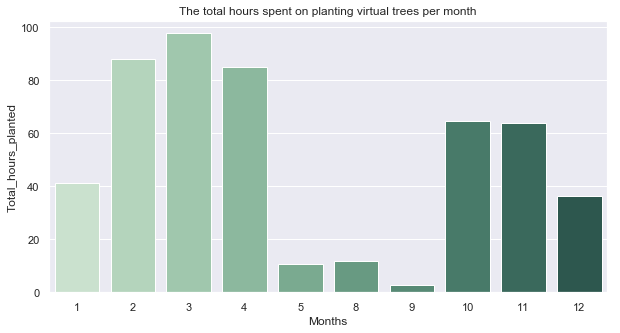

In [289]:
## Could add all the months, since there is no data on months 6 & 7, could indicate it in the plot

plt.figure(figsize = (10,5))
# fontscale 
sns.set(font_scale=1)

data_2018.head()
data_month = data_2018.groupby('month')['time_diff_min'].sum()

data_month = data_month.reset_index()
sns.barplot(x='month', y='time_diff_min', data = data_month, palette="ch:2.5,-.2,dark=.3")
plt.ylabel('Total_hours_planted')
plt.xlabel('Months')
plt.title('The total hours spent on planting virtual trees per month')
plt.show()

Countplot to see which hour I work mostly at, 2018 version

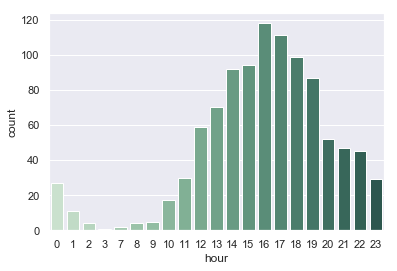

In [273]:
sns.countplot('hour', data = data_2018, palette="ch:2.5,-.2,dark=.3")

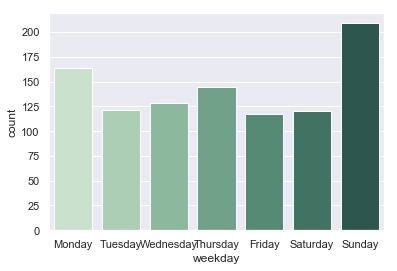

In [274]:
# barplot to see which day I plant the most trees
# It seems Sunday and Monday seems to be the days where I plant the most in 2018
sns.countplot('weekday', data = data_2018, palette="ch:2.5,-.2,dark=.3")